In [218]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [219]:
df_new = pd.read_csv('df_new.csv', index_col=0)
df_new.head()

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
1,abbey,5,1.767767,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,22.010473
2,abbreviate,10,1.809143,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,17.096149
3,abdicate,8,2.047926,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,16.921411
4,abdication,10,1.961122,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,16.967395
5,abdomen,7,2.171175,5.486,5.441,6.606,6.235,4.636,5.457,3.529,4.600,0,20.507543


In [220]:
df_new.shape

(4357, 13)

In [221]:
4682-4357

325

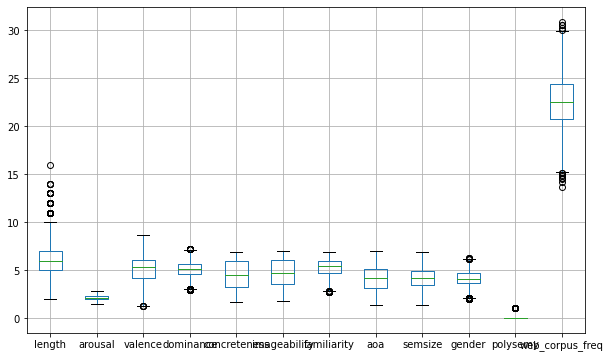

In [222]:
df_new.boxplot(figsize=(10,6))
plt.show()

In [76]:
tab = pd.crosstab(df_new['polysemy'], df_new['length'])
tab

length,2,3,4,5,6,7,8,9,10,11,12,13,14,16
polysemy,,,,,,,,,,,,,,
0,2,108,559,751,804,695,431,286,205,97,34,9,4,1
1,0,37,139,114,47,23,8,2,1,0,0,0,0,0


In [77]:
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram

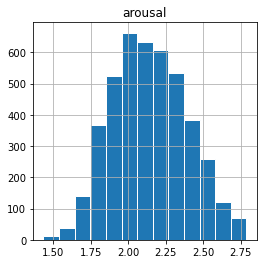

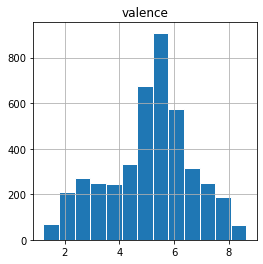

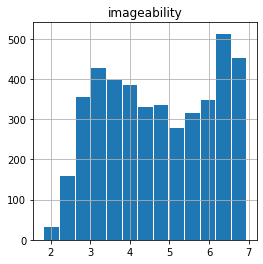

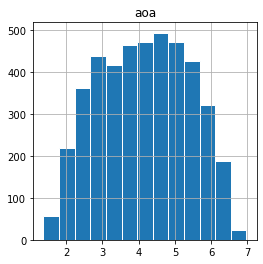

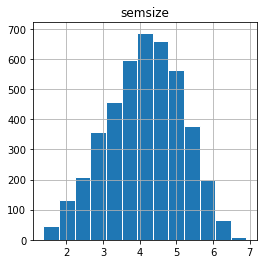

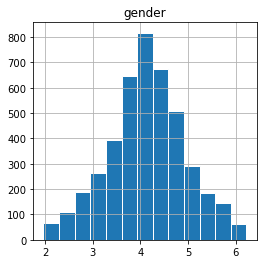

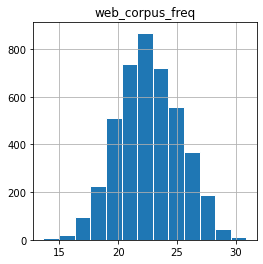

In [78]:
cols = [col for col in df_new.columns if col != 'word']     # elimino word
cols = [col for col in cols if col != 'polysemy']           # elimino polysemy
cols = [col for col in cols if col != 'length']             # elimino length
cols = [col for col in cols if col != 'concreteness']       # elimino concreteness
cols = [col for col in cols if col != 'dominance']          # elimino dominance
cols = [col for col in cols if col != 'familiarity']        # elimino familiarity


#cols = [col for col in df_new.columns if col != 'word']    #ripristino
for i in cols:
    df_new[i].hist(bins=13, edgecolor='white', figsize=(4,4))
    plt.title(i)
    plt.show()

In [214]:
################ STANDARD SCALER ###########
X = df_new[cols].values
scaler = StandardScaler()
X_scal = scaler.fit_transform(X)

#l'np array viene inserito all'interno di un dataframe per una migliore gestione 
df_scaler = pd.DataFrame( X_scal, columns = df_new[cols].columns )

<function matplotlib.pyplot.show(close=None, block=None)>

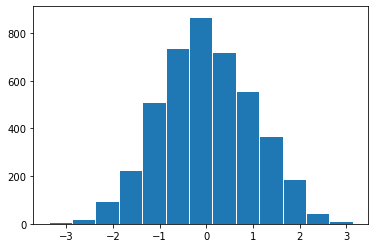

In [81]:
plt.hist(X_scal[:,6],bins=13, edgecolor='white' )
plt.show

In [213]:
################ MINMAX SCALER ###########
scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)

#l'np array viene inserito all'interno di un dataframe per una migliore gestione 
df_scaler_minmax = pd.DataFrame( X_minmax, columns = df_new[cols].columns )

<function matplotlib.pyplot.show(close=None, block=None)>

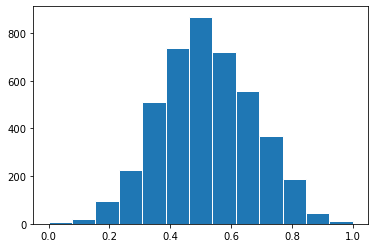

In [84]:
plt.hist(X_minmax[:,6],bins=13, edgecolor='white' )
plt.show

In [244]:
sse_list = []

                                      #sqr(n)= 66
for k in range(2, 66):                #dove n= 4357
    kmeans = KMeans(n_clusters=k, n_init=50, max_iter=100)
    kmeans.fit(X_minmax)
    sse_list.append( kmeans.inertia_ )

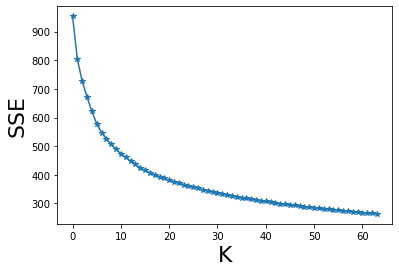

In [245]:
plt.plot( sse_list, marker='*')
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.show()

In [163]:
from sklearn import metrics

k_test = range(2,25,1) # [2,...., 36]
silhouette_scores = {}

for k in k_test:
    model_kmeans_k = KMeans( n_clusters = k )
    model_kmeans_k.fit(X_minmax)
    labels_k = model_kmeans_k.labels_
    k_score = metrics.silhouette_score(X_minmax, labels_k)
    silhouette_scores[k] = k_score
    print("With k = ", k ,"   ", "SS:","  " , k_score)
    
print("Done!")

With k =  2     SS:    0.2279620787754939
With k =  3     SS:    0.21468285217403815
With k =  4     SS:    0.19107317243678107
With k =  5     SS:    0.16878372182018928
With k =  6     SS:    0.1794124661444743
With k =  7     SS:    0.17401748851085136
With k =  8     SS:    0.1741853735473771
With k =  9     SS:    0.16581802602522772
With k =  10     SS:    0.16379127748683947
With k =  11     SS:    0.15802850339876326
With k =  12     SS:    0.1549009559860991
With k =  13     SS:    0.1564183259711254
With k =  14     SS:    0.15017740660838017
With k =  15     SS:    0.14731292989341552
With k =  16     SS:    0.14792778099006076
With k =  17     SS:    0.14648098350717492
With k =  18     SS:    0.1433741027331143
With k =  19     SS:    0.14657409127123144
With k =  20     SS:    0.14259280847662828
With k =  21     SS:    0.13905874815218697
With k =  22     SS:    0.14101847785135488
With k =  23     SS:    0.14023209668319653
With k =  24     SS:    0.13602642994522968
Wi

In [164]:
silhouette_scores.values()

dict_values([0.2279620787754939, 0.21468285217403815, 0.19107317243678107, 0.16878372182018928, 0.1794124661444743, 0.17401748851085136, 0.1741853735473771, 0.16581802602522772, 0.16379127748683947, 0.15802850339876326, 0.1549009559860991, 0.1564183259711254, 0.15017740660838017, 0.14731292989341552, 0.14792778099006076, 0.14648098350717492, 0.1433741027331143, 0.14657409127123144, 0.14259280847662828, 0.13905874815218697, 0.14101847785135488, 0.14023209668319653, 0.13602642994522968, 0.13518661102979215, 0.13710774590461264, 0.13582066855750283, 0.13448315985798848, 0.13105998588697432, 0.13314813399882827, 0.13179450597864734, 0.13584124942735898, 0.13361361601236155, 0.12957400803716865, 0.13166058394661373])

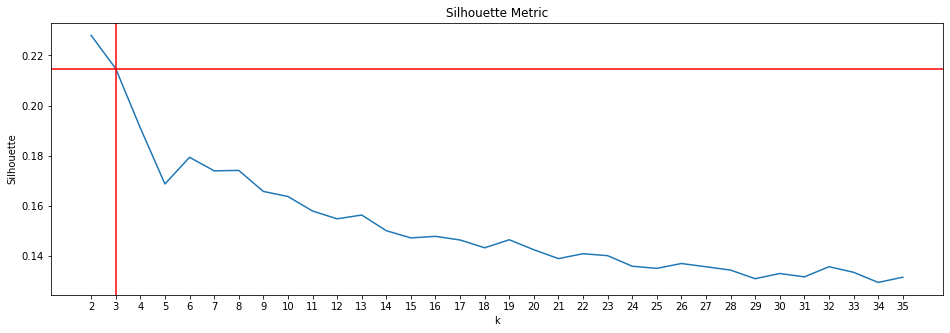

In [165]:
plt.figure(figsize = (16,5))
plt.plot(np.array(list(silhouette_scores.values())).astype(float))
plt.xticks(range(0,34,1), silhouette_scores.keys())
plt.title("Silhouette Metric")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.axhline(0.21468285217403815, color = "r") # axh = horizontal line
plt.axvline(1, color = "r")                   # axv = vertical line
plt.show()

In [99]:
cols

['arousal',
 'valence',
 'imageability',
 'aoa',
 'semsize',
 'gender',
 'web_corpus_freq']

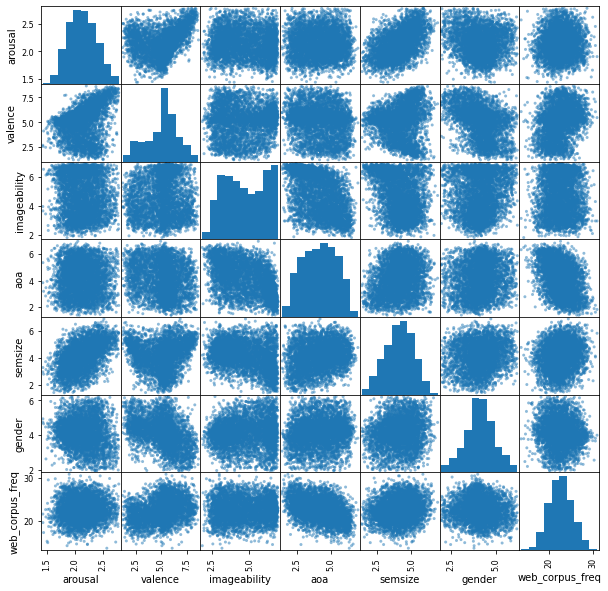

In [111]:
pd.plotting.scatter_matrix(df_new[cols], figsize=(10,10))
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.22796284211955564
For n_clusters = 3 The average silhouette_score is : 0.21459589519777003
For n_clusters = 4 The average silhouette_score is : 0.19006750686282312
For n_clusters = 5 The average silhouette_score is : 0.16857642498231937
For n_clusters = 6 The average silhouette_score is : 0.17934802380241177
For n_clusters = 7 The average silhouette_score is : 0.1747677882170302


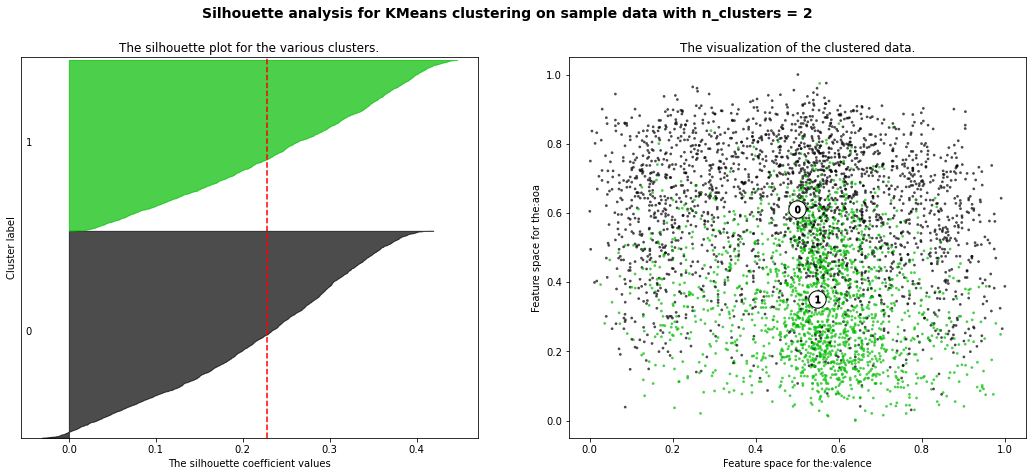

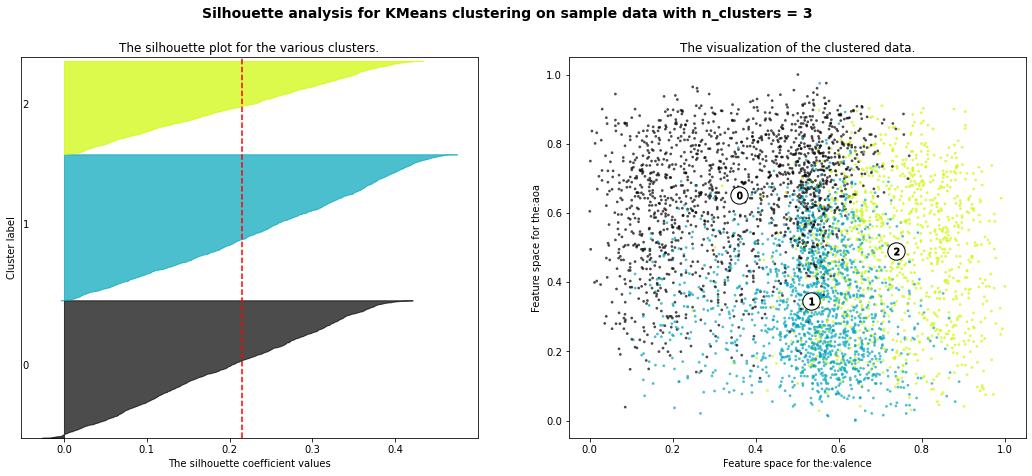

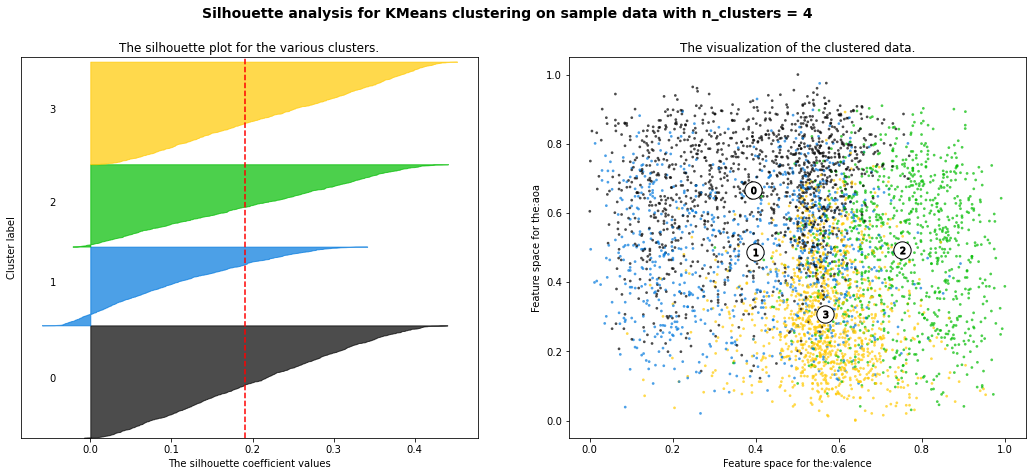

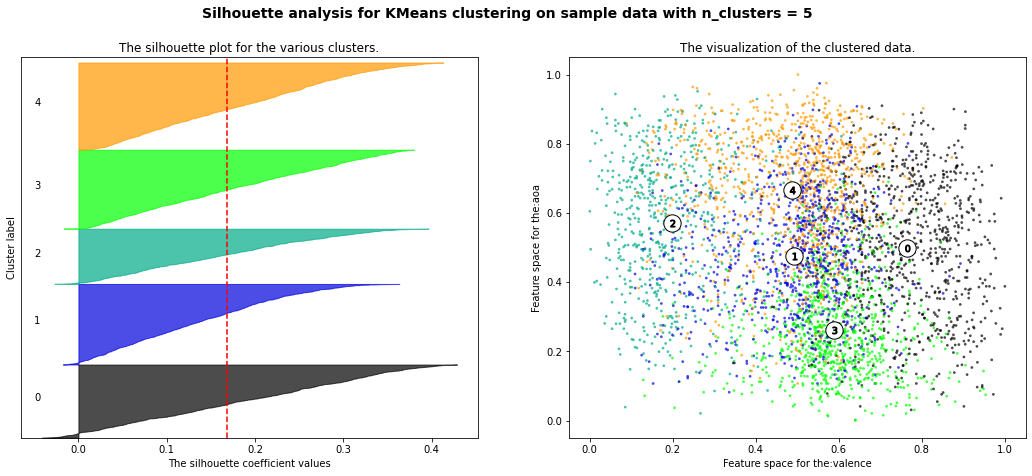

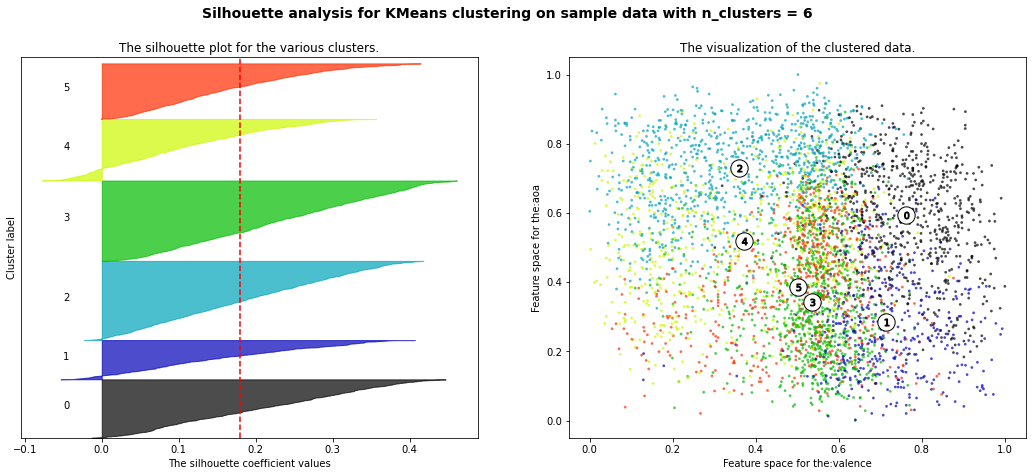

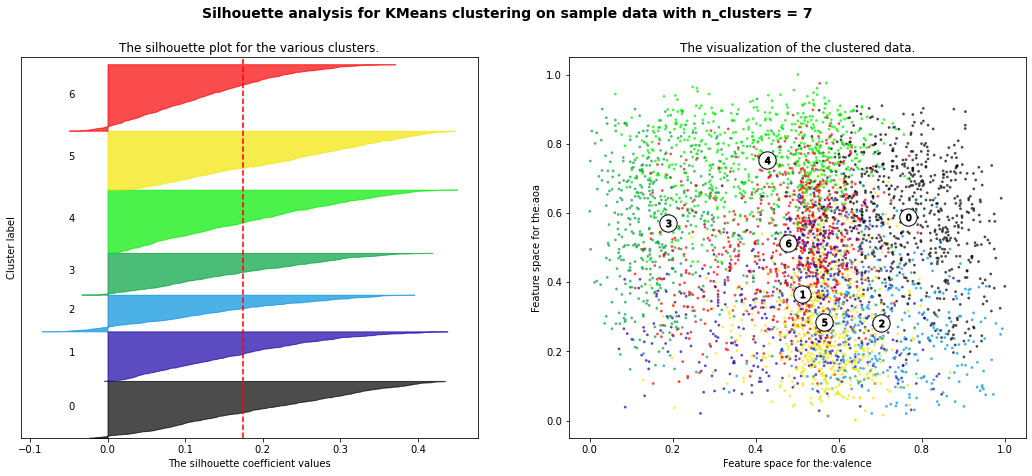

In [227]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
pippo=1
baudo=3

range_n_clusters = [2, 3, 4, 5, 6,7]
for n_clusters in range_n_clusters:
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # The 1st subplot is the silhouette plot
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_minmax) + (n_clusters + 1) * 10])
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init=10, max_iter=100)
    cluster_labels = clusterer.fit_predict(X_minmax)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_minmax, cluster_labels)
    print("For n_clusters =",n_clusters,"The average silhouette_score is :",silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_minmax, cluster_labels)
    y_ticks = []
    y_lower =  y_upper = 0
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Compute the new y_lower for next plot
        y_lower += len(ith_cluster_silhouette_values) 
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")      
    avg_score = np.mean(silhouette_avg)     
    
    # The vertical line for average silhouette score of all the values
    ax1.axvline(avg_score, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_minmax[:, pippo], X_minmax[:, baudo], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, pippo],
        centers[:, baudo],
        marker="o",
        c="white",
        alpha=1,
        s=300,
        edgecolor="k"
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[pippo], c[baudo], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data." )
    ax2.set_xlabel("Feature space for the:"+cols[pippo])
    ax2.set_ylabel("Feature space for the:"+cols[baudo])
    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,           
        fontweight="bold",
    )
plt.show()

In [228]:
kmeans = KMeans( n_clusters=3, n_init=10, max_iter=200)
kmeans.fit(X_minmax)

KMeans(max_iter=200, n_clusters=3)

In [229]:
kmeans.labels_

array([2, 2, 2, ..., 1, 0, 2])

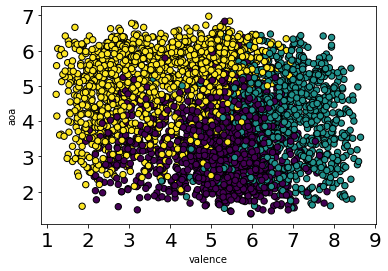

In [230]:
plt.scatter( X[:,pippo], X[:,baudo], s=40, edgecolor='black', c= kmeans.labels_ )
plt.xlabel(cols[pippo])
plt.ylabel(cols[baudo])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

centers = kmeans.cluster_centers_ # centers for X_minmax

# dosen't work as always ***********
#centers_notscal = scaler.inverse_transform(centers) # centers for X
#plt.scatter(centers_notscal[:, pippo],centers_notscal[:, baudo],marker="*",c="r",alpha=1,s=300,edgecolor="k")

plt.show()

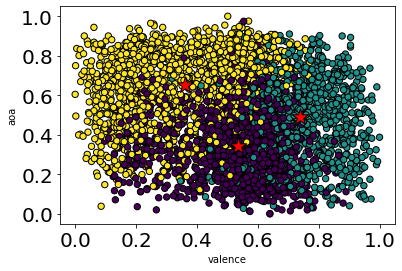

In [231]:
plt.scatter( X_minmax[:,pippo], X_minmax[:,baudo], s=40, edgecolor='black', c= kmeans.labels_ )
plt.xlabel(cols[pippo])
plt.ylabel(cols[baudo])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.scatter(centers[:, pippo],centers[:, baudo],marker="*",c="r",alpha=1,s=300,edgecolor="k")

plt.show()

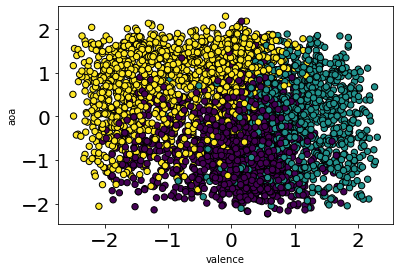

In [232]:
plt.scatter( X_scal[:,pippo], X_scal[:,baudo], s=40, edgecolor='black', c= kmeans.labels_ )
plt.xlabel(cols[pippo])
plt.ylabel(cols[baudo])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [233]:
kmeans.cluster_centers_

array([[0.45961662, 0.53364126, 0.82421354, 0.34530556, 0.3860684 ,
        0.51735259, 0.53077629],
       [0.67821209, 0.73815019, 0.40969594, 0.48947471, 0.61808429,
        0.39024173, 0.59045429],
       [0.48216541, 0.35960252, 0.3959561 , 0.652488  , 0.52937911,
        0.57890541, 0.45667125]])

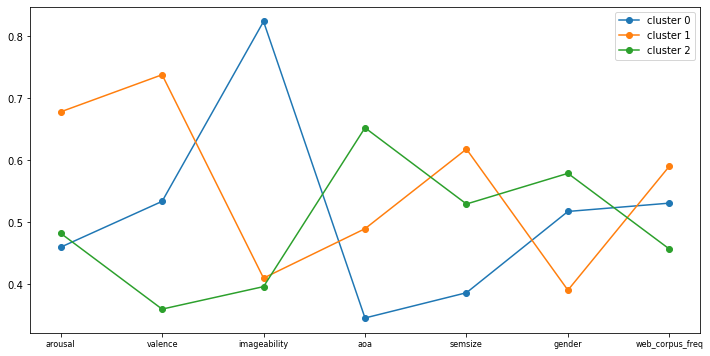

In [234]:
#X_meno=Data1.drop(['word','length','concreteness','dominance','familiarity','web_corpus_freq', 'polysemy'], axis=1)

plt.figure(figsize=(12, 6))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(df_new[cols].columns)),df_new[cols].columns, fontsize=8)
plt.legend(fontsize=10)
plt.show()
#abbiamo un buon cluster perché sono ben separate tra di loro, i gruppi nel dataset sono ben separati tra di loro

[]

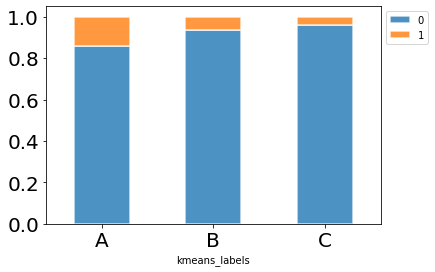

In [235]:
clust_name = ['A', 'B', 'C']

df_new['kmeans_labels'] = kmeans.labels_

bar_pl = df_new['polysemy'].groupby(df_new['kmeans_labels']).value_counts(normalize=True).unstack(1)
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5)

plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1,1))

plt.plot()

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

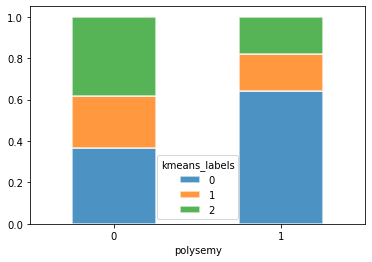

In [236]:
bar_pl = df_new['kmeans_labels'].groupby(df_new['polysemy']).value_counts(normalize=True).unstack(1)
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5)
plt.xticks ( rotation=0)



In [237]:
a=0
a=(df_new['length'].unique())
a.sort()
str(a)

'[ 2  3  4  5  6  7  8  9 10 11 12 13 14 16]'

[]

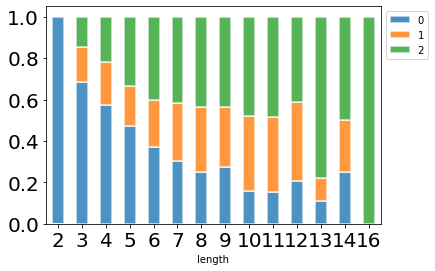

In [238]:
df_new['kmeans_labels'] = kmeans.labels_
clust_length = a

bar_pl = df_new['kmeans_labels'].groupby(df_new['length']).value_counts(normalize=True).unstack(1)
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5)

plt.xticks(range(0, len(clust_length)), clust_length, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1,1))

plt.plot()
# fare il plot con alla base i cluster

[]

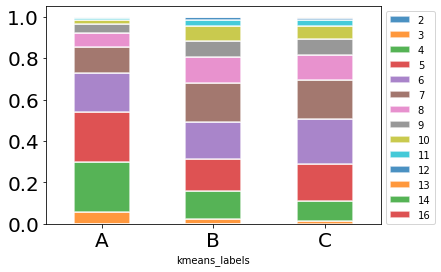

In [239]:
df_new['kmeans_labels'] = kmeans.labels_
bar_pl = df_new['length'].groupby(df_new['kmeans_labels']).value_counts(normalize=True).unstack(1)
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5)

plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1,1))
plt.plot()


In [240]:
print('SSE', kmeans.inertia_)                      #più piccolo è meglio è
print('Silhouette', silhouette_score(X_minmax, kmeans.labels_))

SSE 803.3435891940945
Silhouette 0.21459221288106134


# DBSCAN

In [167]:
dist = pdist(X_minmax, 'euclidean')
dist = squareform(dist)
dist[0] # distance dei punti dal primo punto

array([0.        , 0.70108973, 0.86170909, ..., 0.74972025, 0.76842072,
       0.43472148])

In [168]:
k=5 #cerchiamo il vaolore eps migliore per min_samples=5 (preso come ipotesi)
    # k = min_samples, which min_samples test?
kth_distances = []
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

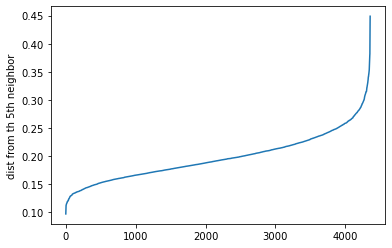

In [169]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from th 5th neighbor')
         
plt.show() # valore migliore eps tra 0,3 e 0,35 se scegli 5 come min_samples

In [190]:
dbscan=DBSCAN(eps=0.35,min_samples=100, metric='euclidean') # which min_samples????
dbscan.fit(X_minmax)
dbscan.labels_ # -1 is a noise

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

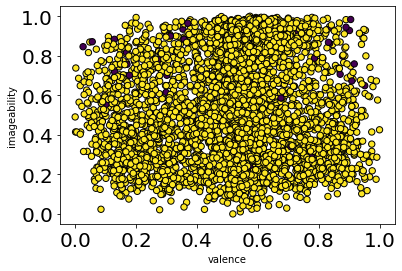

In [191]:
plt.scatter(X_minmax[:,pippo],X_minmax[:,baudo], s=40, edgecolor='black', c=dbscan.labels_)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(cols[pippo])
plt.ylabel(cols[baudo])
plt.show()

# Hierarichical

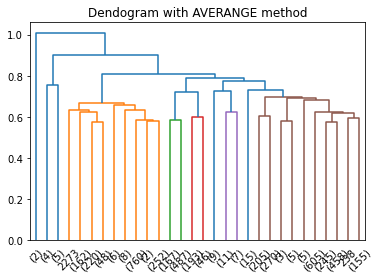

In [196]:
data_dist = pdist(X_minmax, 'euclidean')
data_link = linkage(data_dist, method='average')#dobbiamo scegliere il metodo per selezionare, single, comlete, average, ward
                                        #ogni volta che usi un metodo ti da risultati deversi, scegli qullo che ti piace di più e commentali nel report
res= dendrogram(data_link, truncate_mode='lastp') # dobbiamo usare il metodo TRUNCATED_MODE per evitare di stampare tutti i punti che è impossibile vedere tutti i 4800 punti
plt.title("Dendogram with AVERANGE method")
plt.show()

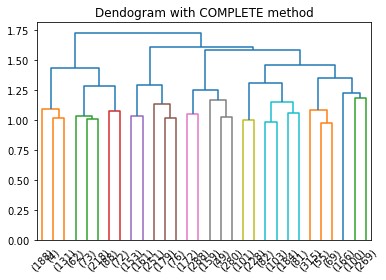

In [195]:
data_dist = pdist(X_minmax, 'euclidean')
data_link = linkage(data_dist, method='complete')#dobbiamo scegliere il metodo per selezionare, single, comlete, average, ward
                                        #ogni volta che usi un metodo ti da risultati deversi, scegli qullo che ti piace di più e commentali nel report
res= dendrogram(data_link, truncate_mode='lastp') # dobbiamo usare il metodo TRUNCATED_MODE per evitare di stampare tutti i punti che è impossibile vedere tutti i 4800 punti
plt.title("Dendogram with COMPLETE method")
plt.show()

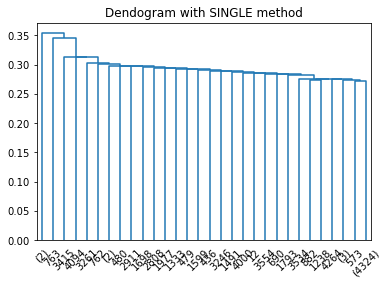

In [197]:
data_dist = pdist(X_minmax, 'euclidean')
data_link = linkage(data_dist, method='single')#dobbiamo scegliere il metodo per selezionare, single, comlete, average, ward
                                        #ogni volta che usi un metodo ti da risultati deversi, scegli qullo che ti piace di più e commentali nel report
res= dendrogram(data_link, truncate_mode='lastp') # dobbiamo usare il metodo TRUNCATED_MODE per evitare di stampare tutti i punti che è impossibile vedere tutti i 4800 punti
plt.title("Dendogram with SINGLE method")
plt.show()

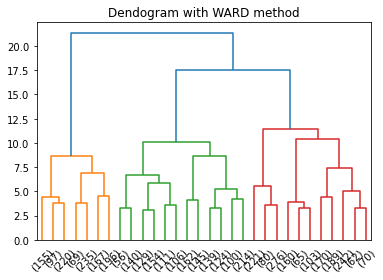

In [198]:
data_dist = pdist(X_minmax, 'euclidean')
data_link = linkage(data_dist, method='ward')#dobbiamo scegliere il metodo per selezionare, single, comlete, average, ward
                                        #ogni volta che usi un metodo ti da risultati deversi, scegli qullo che ti piace di più e commentali nel report
res= dendrogram(data_link, truncate_mode='lastp') # dobbiamo usare il metodo TRUNCATED_MODE per evitare di stampare tutti i punti che è impossibile vedere tutti i 4800 punti
plt.title("Dendogram with WARD method")
plt.show()

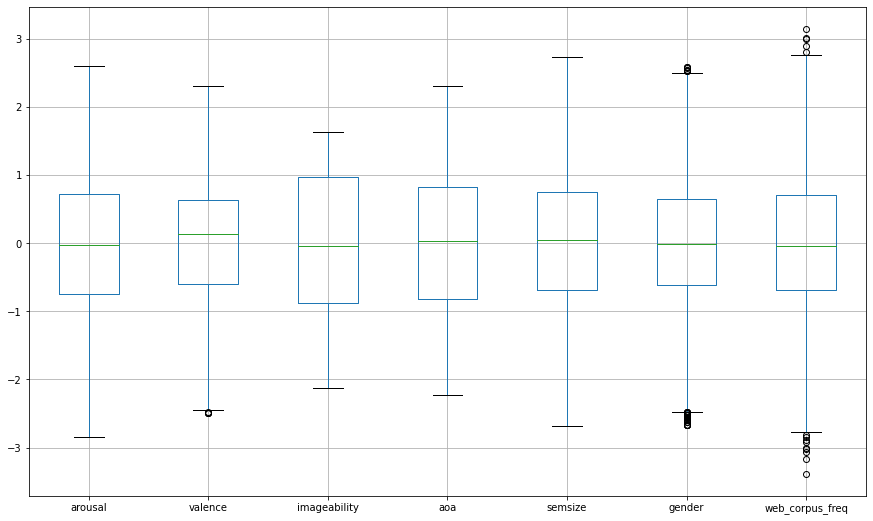

In [223]:
df_scaler.boxplot(figsize=(15,9))
plt.show()

<AxesSubplot:ylabel='Density'>

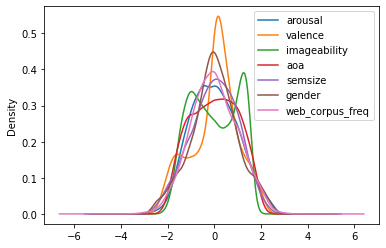

In [225]:
df_scaler.plot(kind='kde')

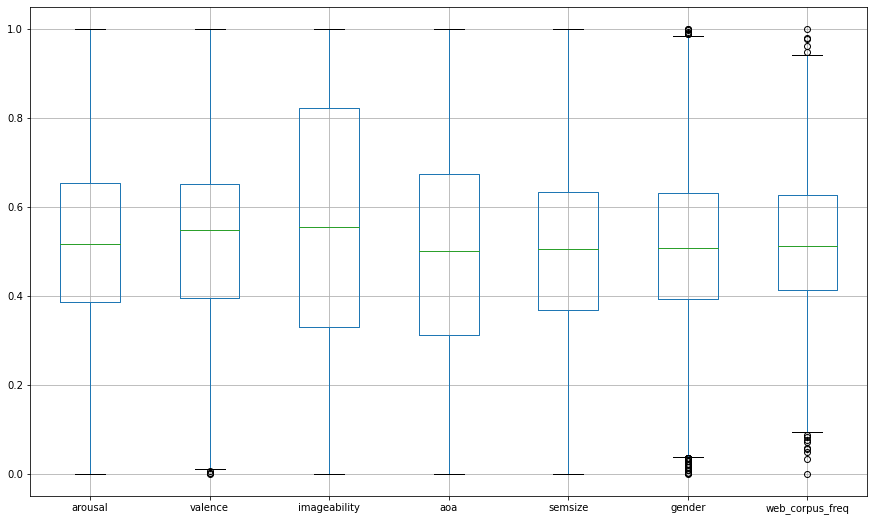

In [224]:
df_scaler_minmax.boxplot(figsize=(15,9))
plt.show()

<AxesSubplot:ylabel='Density'>

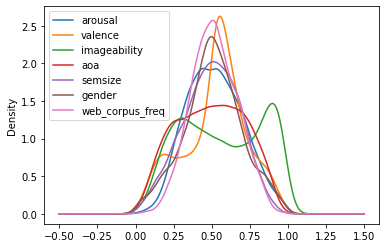

In [226]:
df_scaler_minmax.plot(kind='kde')